#### Name - Animesh Deb


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import os
%matplotlib inline

import warnings
from sklearn.preprocessing import scale 

In [5]:
df= pd.read_csv("water_potability.csv")

df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
# Checking the  null values
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [8]:
#Percentage of null values
round((df.isnull().sum().sort_values(ascending=False)/len(df)*100),2)

Sulfate            23.84
ph                 14.99
Trihalomethanes     4.95
Hardness            0.00
Solids              0.00
Chloramines         0.00
Conductivity        0.00
Organic_carbon      0.00
Turbidity           0.00
Potability          0.00
dtype: float64

In [13]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [11]:
#Checking the duplicate values
df.duplicated().sum()

0

### EDA

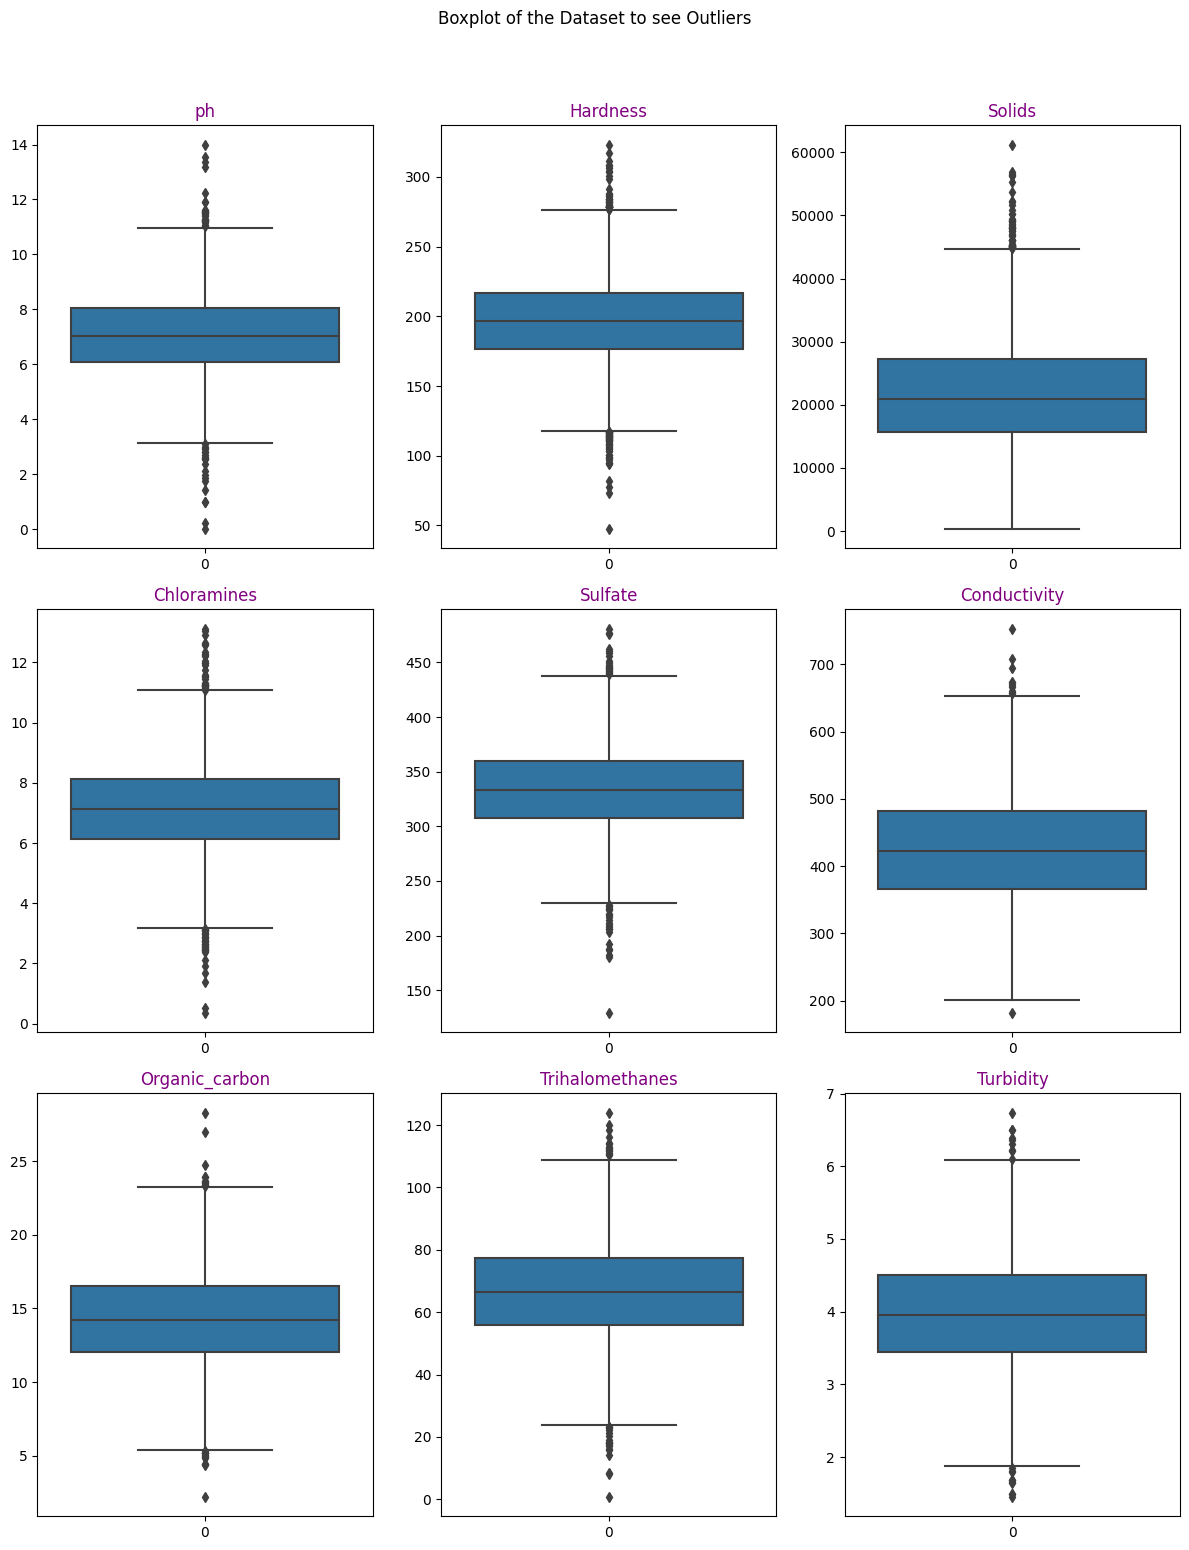

In [58]:
# Univariate boxplot analysis to see Outliers

# Plotting Boxplot to see if there are any outlier in any of the Columns

fig=plt.figure(figsize=(12,15))
fig.suptitle('Boxplot of the Dataset to see Outliers', y=1.03)
for i in range(0,df.iloc[:,0:-1].shape[1]):
    ax=fig.add_subplot(3,3,i+1)
    sns.boxplot(df[df.iloc[:,0:-1].columns[i]])
    ax.set_title(df.iloc[:,0:-1].columns[i], color='purple')
    
plt.tight_layout()
plt.show()

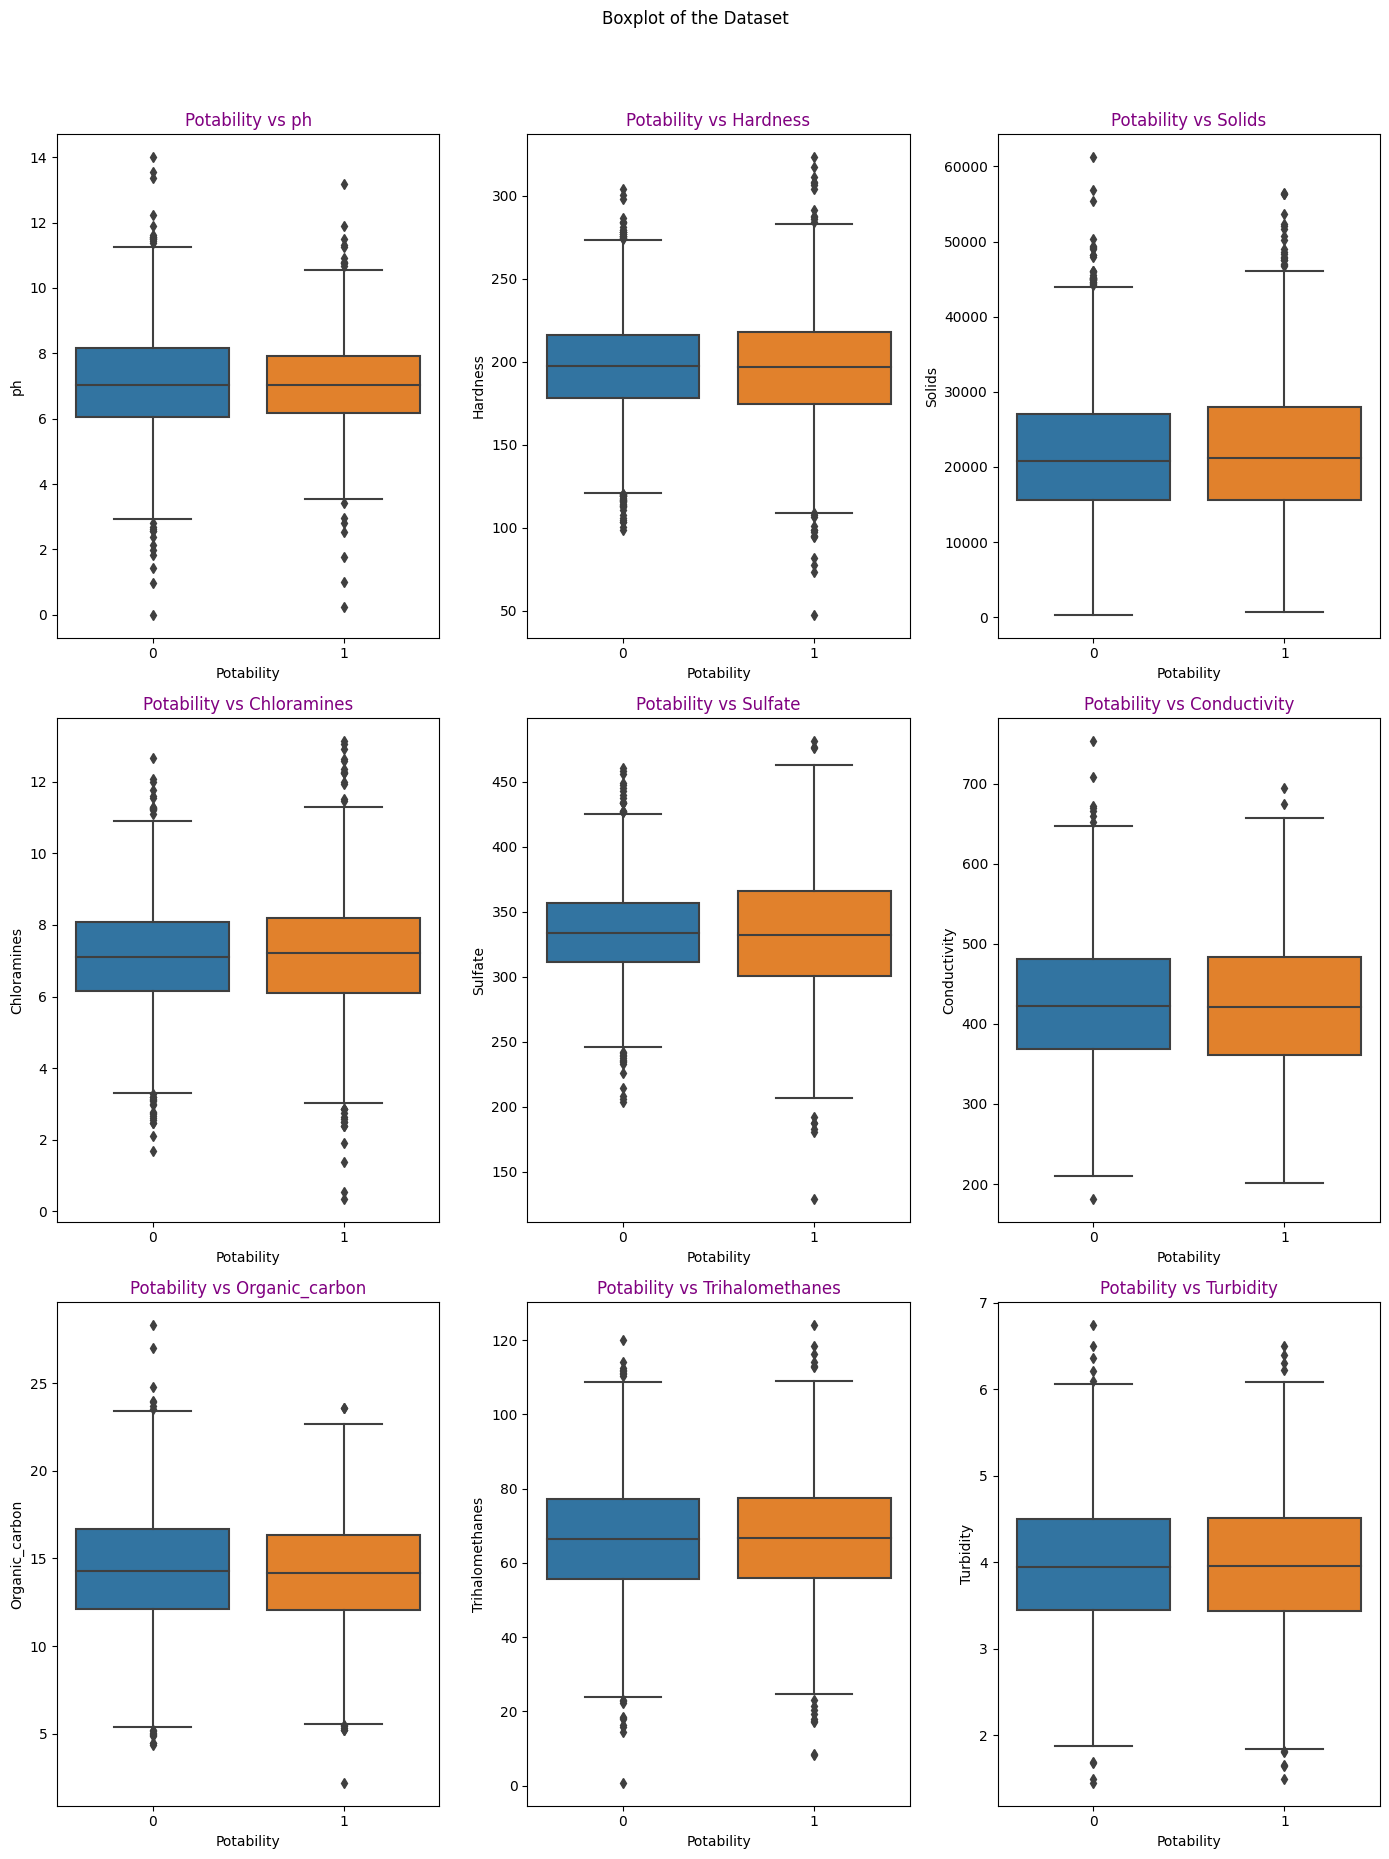

In [18]:
# Bivariate Analysis with the Target Variable Potability

fig=plt.figure(figsize=(14,18))
fig.suptitle('Boxplot of the Dataset', y=1.03)
for i in range(0,df.iloc[:,0:-1].shape[1]):
    ax=fig.add_subplot(3,3,i+1)
    sns.boxplot(x=df['Potability'], y=df[df.iloc[:,0:-1].columns[i]])
    ax.set_title('Potability vs {}'.format(df.iloc[:,0:-1].columns[i]), color='purple')
    
plt.tight_layout()
plt.show()

<Figure size 1400x1800 with 0 Axes>

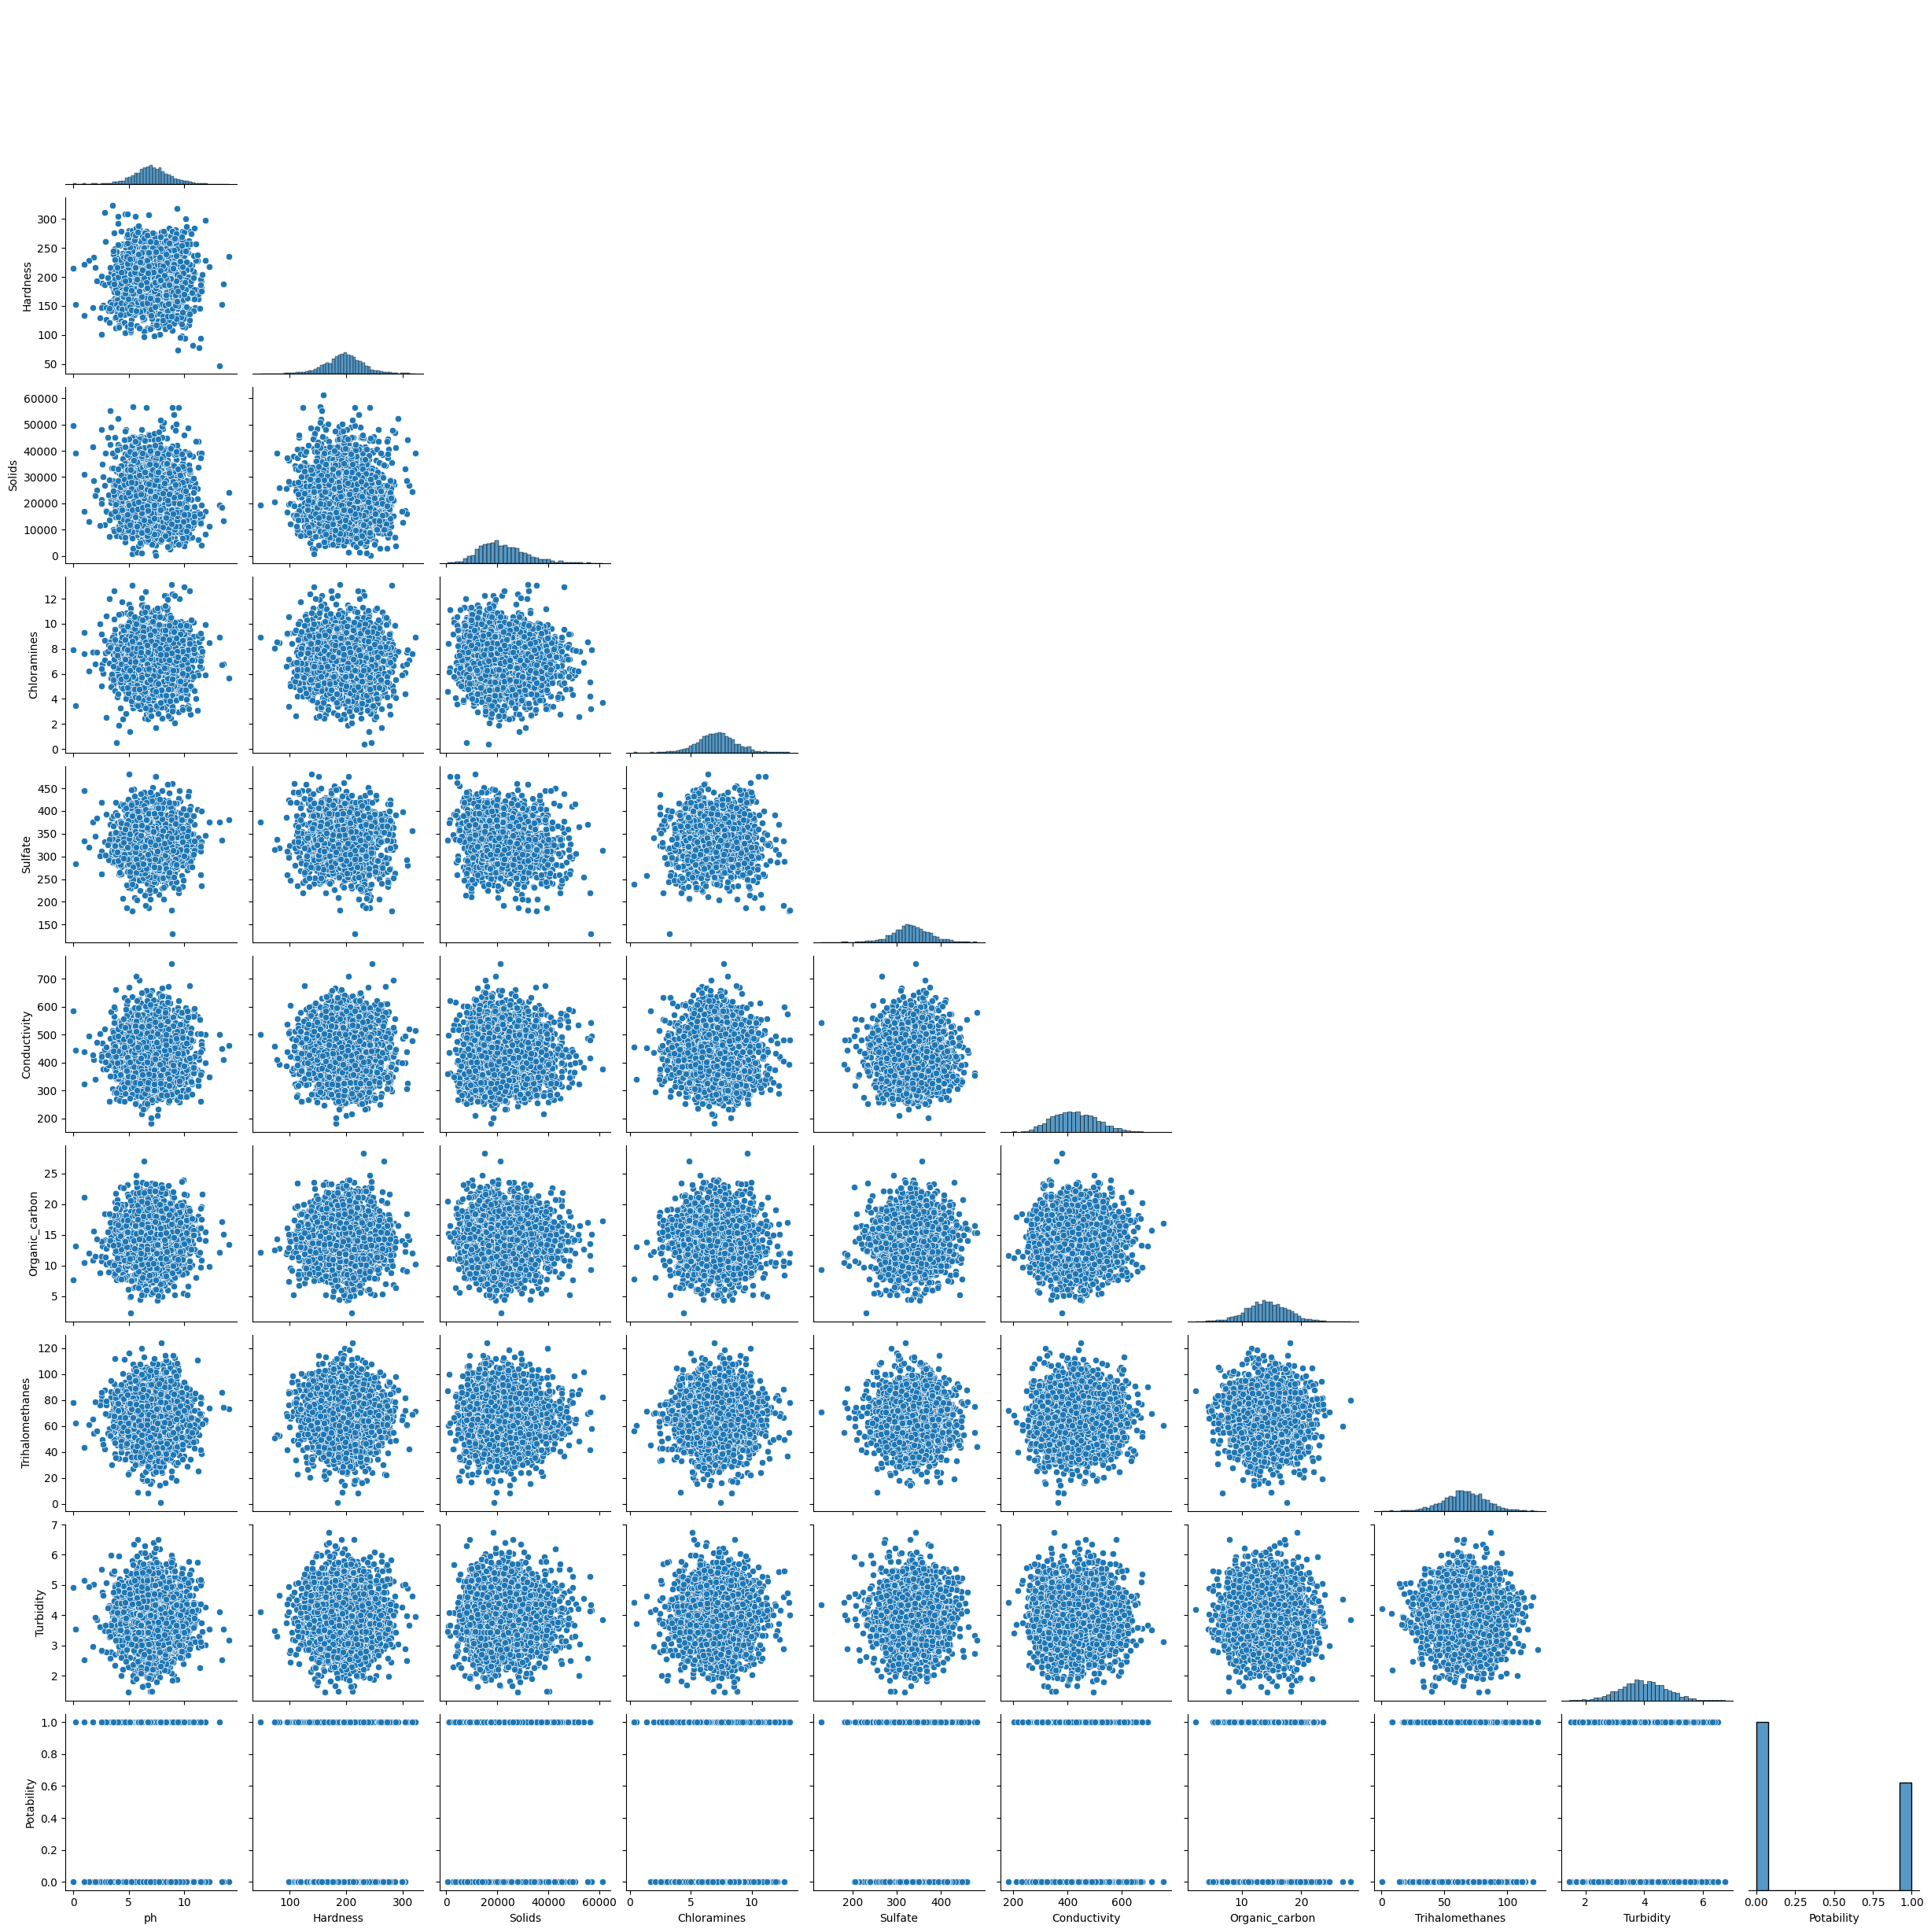

In [20]:
# Multivariate analysis
fig=plt.figure(figsize=(14,18))
sns.pairplot(df, corner=1)

In [28]:
# Treating the null values with KNN imputer
from sklearn.impute import KNNImputer # Dynamic imputation of Missing value
imputer = KNNImputer(n_neighbors=3)
df1= pd.DataFrame(imputer.fit_transform(df.iloc[:,0:-1]),columns=list(df.iloc[:,0:-1].columns))
df1.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,6.655223,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,351.285226,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,347.323743,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [29]:
df1.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

In [30]:
# Scaling the dataset
df_scaled=round(df1.apply(ss.zscore),2)

In [31]:
df_scaled.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,-0.28,0.26,-0.14,0.11,0.92,1.71,-1.18,1.30,-1.29
1,-2.22,-2.04,-0.39,-0.31,0.47,2.06,0.27,-0.63,0.68
2,0.67,0.85,-0.24,1.36,0.36,-0.09,0.78,0.00,-1.17
3,0.82,0.55,0.00,0.59,0.61,-0.78,1.26,2.14,0.85
4,1.33,-0.46,-0.46,-0.36,-0.62,-0.34,-0.82,-2.17,0.14
5,-0.99,-0.25,0.77,0.27,-0.18,-1.80,-1.78,-0.72,-1.80
6,2.08,1.57,0.77,0.25,1.58,-1.76,-0.15,1.15,-1.66
7,1.03,0.21,-0.95,-1.62,-0.80,0.60,-0.58,-0.23,0.56
8,0.35,-2.35,-0.88,0.43,-1.71,-0.46,-0.48,-0.79,-0.48
9,2.71,0.94,0.40,1.24,1.86,1.70,1.10,0.35,0.52


<Figure size 1400x1800 with 0 Axes>

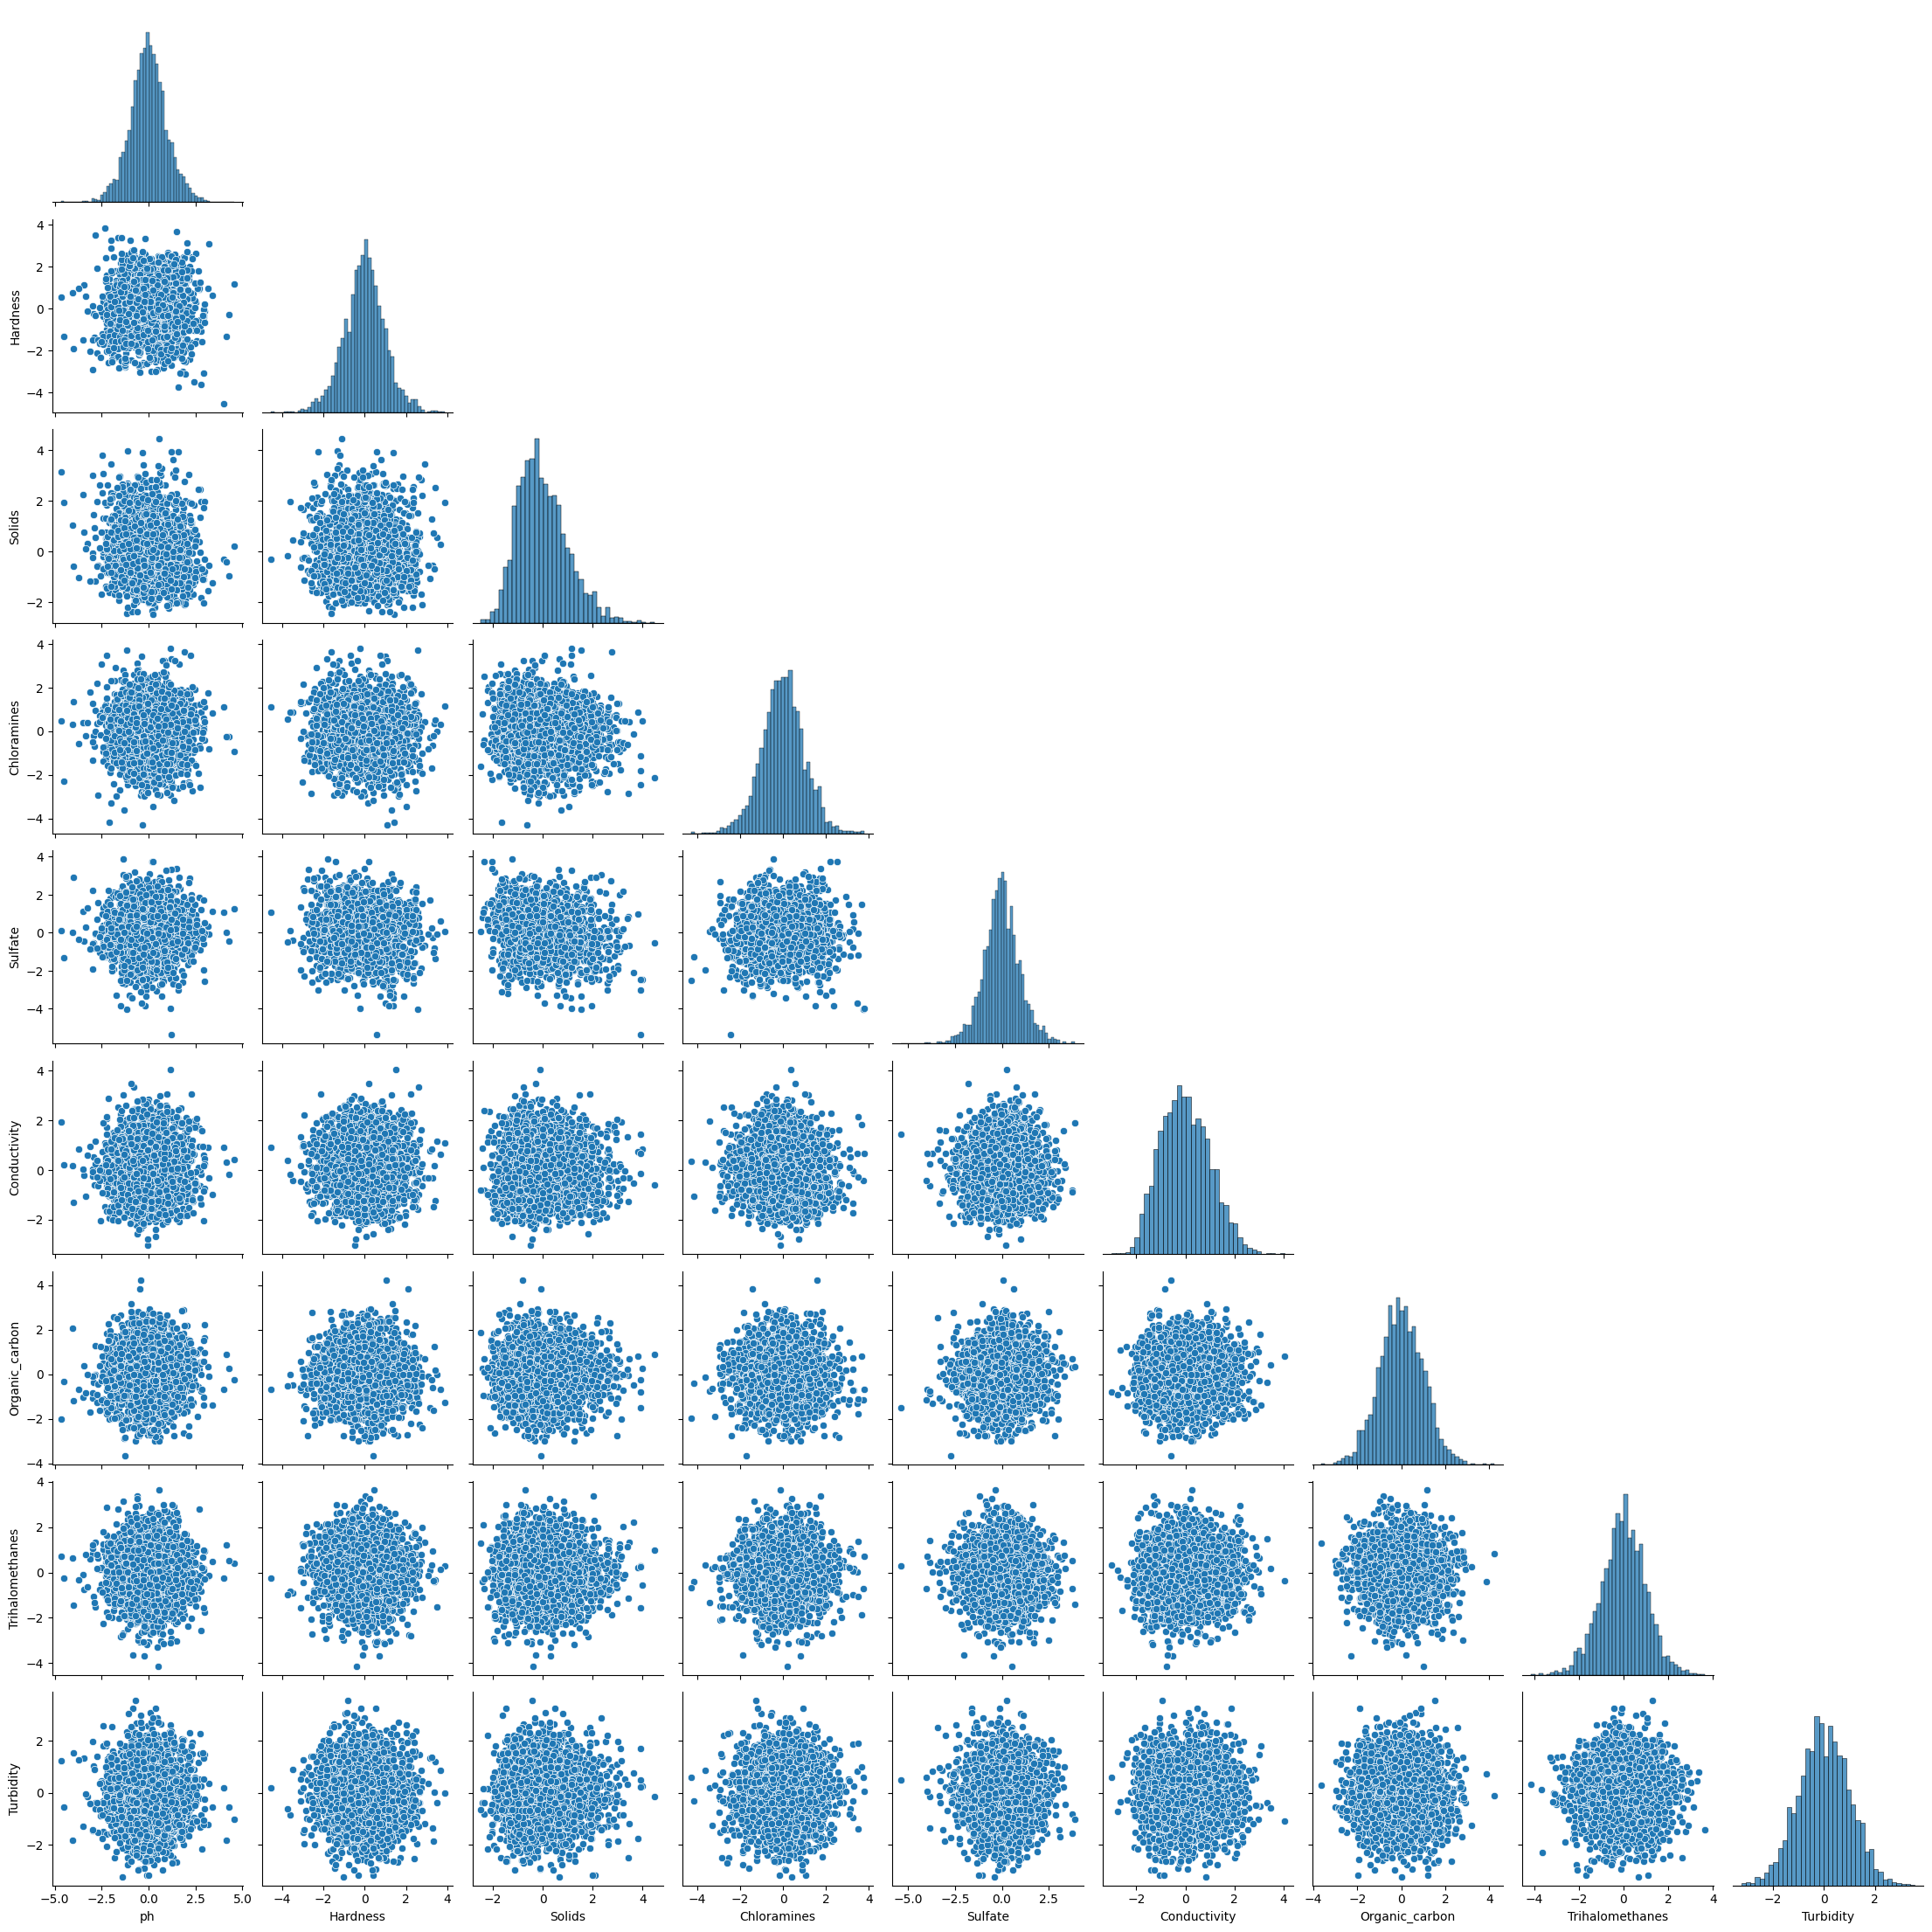

In [32]:
# Pairplot on scaled data
fig=plt.figure(figsize=(14,18))
sns.pairplot(df_scaled, corner=1)

In [42]:
# Correlation analysis
df_corr=df_scaled.corr()
df_corr

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
ph,1.000000,0.078802,-0.105366,-0.029664,0.028257,0.019334,0.036783,-0.003947,-0.032795
Hardness,0.078802,1.000000,-0.047003,-0.030086,-0.108706,-0.023990,0.003643,-0.015975,-0.014300
Solids,-0.105366,-0.047003,1.000000,-0.070176,-0.184037,0.013924,0.010283,-0.003241,0.019527
Chloramines,-0.029664,-0.030086,-0.070176,1.000000,0.030620,-0.020692,-0.012661,0.012346,0.002445
Sulfate,0.028257,-0.108706,-0.184037,0.030620,1.000000,-0.011953,0.027853,-0.031942,-0.011343
Conductivity,0.019334,-0.023990,0.013924,-0.020692,-0.011953,1.000000,0.020922,0.002462,0.005795
Organic_carbon,0.036783,0.003643,0.010283,-0.012661,0.027853,0.020922,1.000000,-0.010675,-0.027263
Trihalomethanes,-0.003947,-0.015975,-0.003241,0.012346,-0.031942,0.002462,-0.010675,1.000000,-0.024100
Turbidity,-0.032795,-0.014300,0.019527,0.002445,-0.011343,0.005795,-0.027263,-0.024100,1.000000


<Axes: >

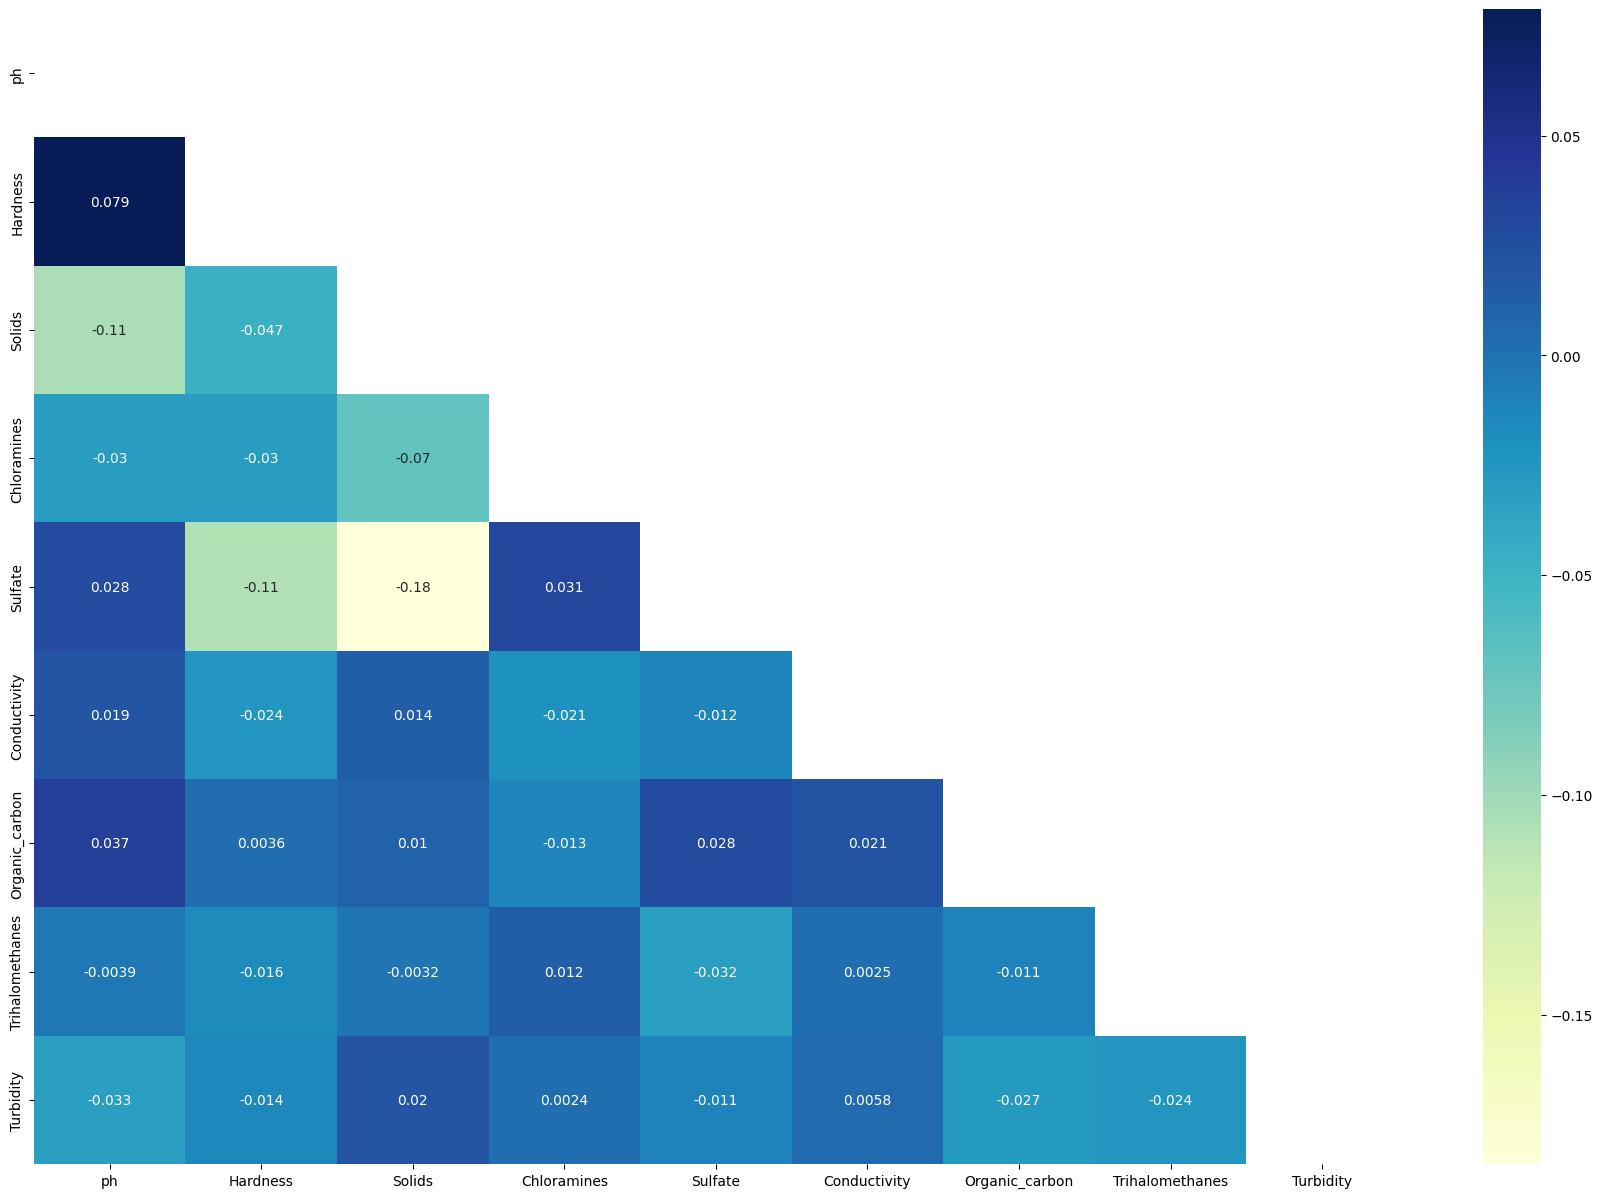

In [37]:
# Heat map
mask= np.triu(np.ones_like(df_scaled.corr())) 
plt.figure(figsize=(22, 15))
sns.heatmap(df_scaled.corr(), annot=True, cmap='YlGnBu', mask=mask,)

In [43]:
# Getting the pair of highly correlated parameters
df_corr1=pd.DataFrame(df_corr.unstack().sort_values()).reset_index()

In [46]:
df_corr1.rename(columns={'level_0':'Var1','level_1':'Var2',0:'Corr_Coeff'}, inplace=True)

In [47]:
df_corr1.head()

,Var1,Var2,Corr_Coeff
0,Sulfate,Solids,-0.184037
1,Solids,Sulfate,-0.184037
2,Sulfate,Hardness,-0.108706
3,Hardness,Sulfate,-0.108706
4,Solids,ph,-0.105366


In [50]:
#Excluding the similar variables and mirror variables showing the pairs with their correlation
df_corr1= df_corr1[df_corr1['Var1']!=df_corr1['Var2']]
df_corr1['Correlated Variables']=df_corr1.apply(lambda x: '-'.join(sorted([x['Var1'],x['Var2']])),axis=1)
df_corr1 = df_corr1.drop_duplicates(['Correlated Variables'])
df_corr1.sort_values(by='Corr_Coeff', ascending=False).reset_index(drop=True)

,Var1,Var2,Corr_Coeff,Correlated Variables
0,Hardness,ph,0.078802,Hardness-ph
1,ph,Organic_carbon,0.036783,Organic_carbon-ph
2,Sulfate,Chloramines,0.030620,Chloramines-Sulfate
3,Sulfate,ph,0.028257,Sulfate-ph
4,Sulfate,Organic_carbon,0.027853,Organic_carbon-Sulfate
5,Organic_carbon,Conductivity,0.020922,Conductivity-Organic_carbon
6,Solids,Turbidity,0.019527,Solids-Turbidity
7,Conductivity,ph,0.019334,Conductivity-ph
8,Solids,Conductivity,0.013924,Conductivity-Solids
9,Trihalomethanes,Chloramines,0.012346,Chloramines-Trihalomethanes


In [ ]:
# Correlation is Very less

In [55]:
df_scaled["ph"].astype(int)

0       0
1      -2
2       0
3       0
4       1
       ..
3271   -1
3272    0
3273    1
3274   -1
3275    0
Name: ph, Length: 3276, dtype: int64

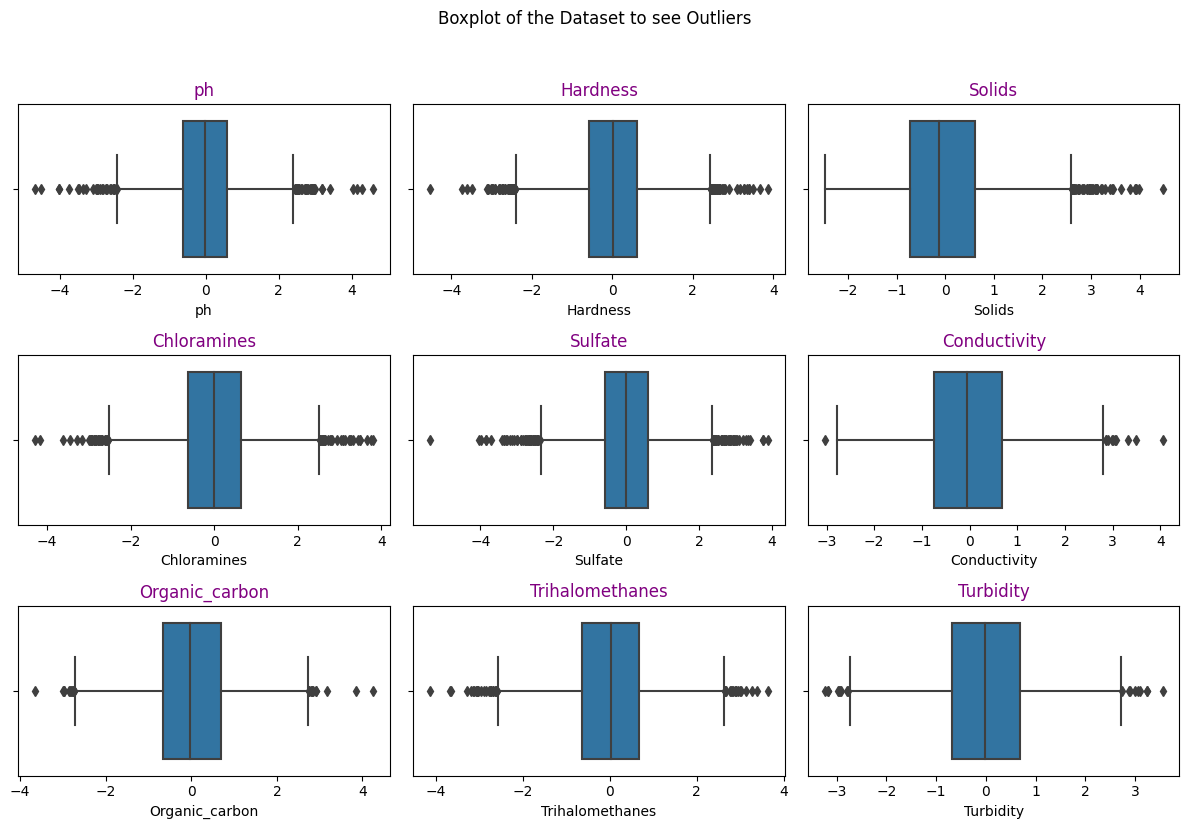

In [59]:
# Checking the Ouliers on Scaled data

fig = plt.figure(figsize=(12, 8))
fig.suptitle('Boxplot of the Dataset to see Outliers', y=1.03)

for i in range(0, df_scaled.shape[1]):
    ax = fig.add_subplot(3, 3, i + 1)
    sns.boxplot(data=df_scaled, x=df_scaled.columns[i])
    ax.set_title(df_scaled.columns[i], color='purple')

plt.tight_layout()
plt.show()



In [65]:
# There are Outliers in all the parameters, Treating the Outliers
# List of Column names  below

columns = list(df_scaled.columns)
columns

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity']

In [62]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [66]:
df_scaled1 = df_scaled.copy()

for column in columns:
    lr,ur=remove_outlier(df_scaled1[column])
    df_scaled1[column]=np.where(df_scaled1[column]>ur,ur,df_scaled1[column])
    df_scaled1[column]=np.where(df_scaled1[column]<lr,lr,df_scaled1[column])

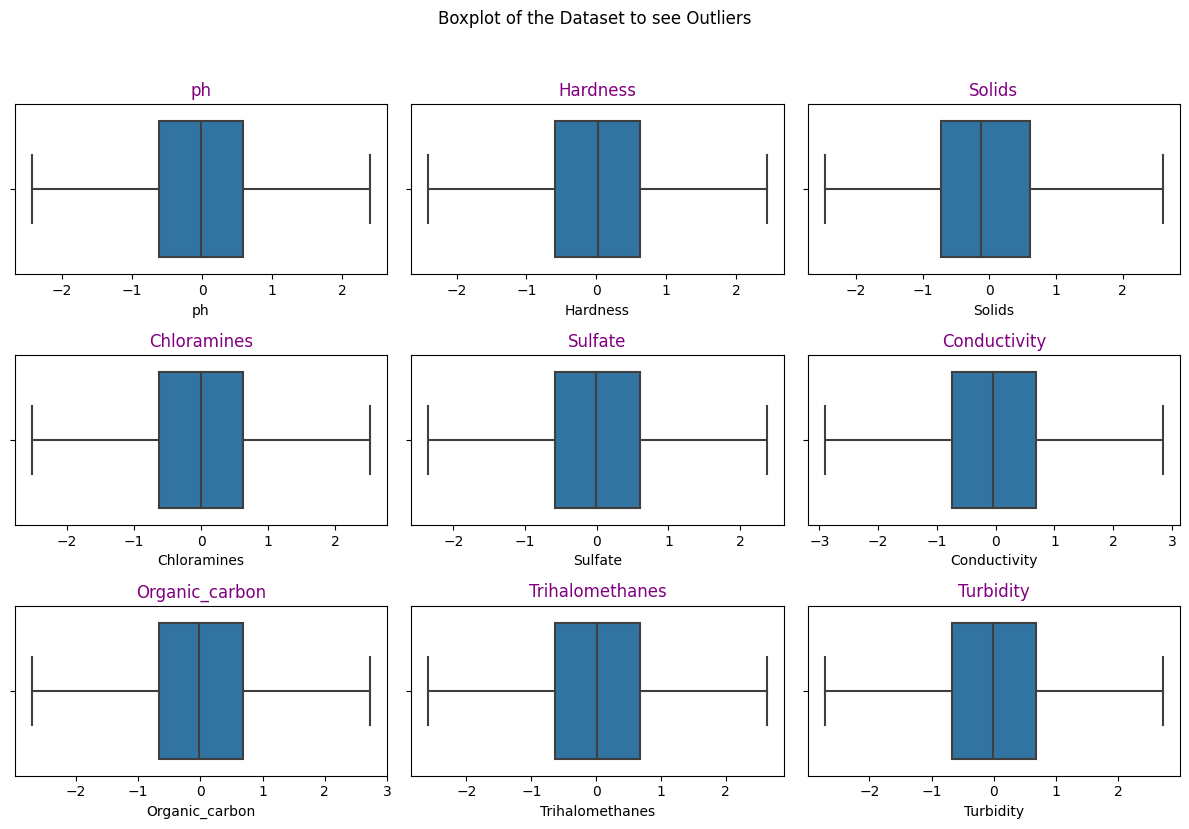

In [67]:
# Checking the outlier after treatment
fig = plt.figure(figsize=(12, 8))
fig.suptitle('Boxplot of the Dataset to see Outliers', y=1.03)

for i in range(0, df_scaled1.shape[1]):
    ax = fig.add_subplot(3, 3, i + 1)
    sns.boxplot(data=df_scaled1, x=df_scaled1.columns[i])
    ax.set_title(df_scaled1.columns[i], color='purple')

plt.tight_layout()
plt.show()

In [72]:
# Getting the PCA values for each feature

pd.options.display.float_format = "{:,.3f}".format
from sklearn.decomposition import PCA
pca=PCA(n_components=9, random_state=123)
pca.fit_transform(df_scaled1)

#

array([[-0.46172968,  0.09657203, -0.50349357, ...,  0.20274536,
        -0.67280543, -0.94249394],
       [ 0.68835629,  2.22744092, -2.3923825 , ...,  0.1520195 ,
        -1.29517689,  0.89042471],
       [-1.2479551 , -0.72465459,  0.02422728, ...,  1.31539653,
         0.27460154, -0.56338269],
       ...,
       [ 0.51556294, -0.47587803,  0.16304968, ..., -0.08048507,
         2.04096901, -0.41218281],
       [ 0.01263086,  0.38176245,  1.32632076, ..., -0.5480207 ,
        -1.84041766,  0.23119095],
       [-1.09253011, -0.72551274,  0.41129419, ..., -0.11138412,
         0.31855552,  0.3072696 ]])

In [73]:
# Checking the Covariance matrix
df_cov_maxtrix=pd.DataFrame(pca.get_covariance(), columns=df_scaled1.columns, index=df_scaled1.columns)
df_cov_maxtrix

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
ph,0.933,0.086,-0.098,-0.033,0.027,0.020,0.033,-0.004,-0.030
Hardness,0.086,0.948,-0.046,-0.025,-0.096,-0.024,0.002,-0.016,-0.015
Solids,-0.098,-0.046,0.961,-0.068,-0.168,0.013,0.012,-0.006,0.020
Chloramines,-0.033,-0.025,-0.068,0.952,0.033,-0.021,-0.013,0.011,0.002
Sulfate,0.027,-0.096,-0.168,0.033,0.920,-0.010,0.024,-0.029,-0.010
Conductivity,0.020,-0.024,0.013,-0.021,-0.010,0.994,0.021,0.002,0.006
Organic_carbon,0.033,0.002,0.012,-0.013,0.024,0.021,0.989,-0.010,-0.028
Trihalomethanes,-0.004,-0.016,-0.006,0.011,-0.029,0.002,-0.010,0.972,-0.024
Turbidity,-0.030,-0.015,0.020,0.002,-0.010,0.006,-0.028,-0.024,0.990


In [75]:
pip install factor-analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 693.2 kB/s eta 0:00:00 kB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 kB 3.7 MB/s eta 0:00:003.1 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 9.0 MB/s eta 0:00:000m eta 0:00:0136m0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 14.2 MB/s eta 0:00:00
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42487 sha256=694f7c5bec26581caefb070a5f63f4c96e3563cc7a76a0e5248379d13bc274c5
  Stored in directory: /home/animesh23/.cache/pip/wheels/74/a2/6c/26fb1addf1ce6c60a8cef8397f2999f0a1e6e2fcddc8abf33e
Successfully built factor-analyzer
  Attempting uninstall: platformdirs
    Found existing installation: platformd

In [76]:
# Checking for significant correations in  order to perfrom PCA
# Ho = Coorellation is not significant, Ha=Coorellation is significant
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_scaled1)
print(f'pvalue : {p_value}')

#Now checking if sample size is adequate using KMO model, above 0.7 is good, below 0.5 is not adequate
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(df_scaled1)
print(f'kmo_model : {kmo_model}')


pvalue : 2.2847775062742957e-38
kmo_model : 0.49407049419324783


In [80]:
# As seen above, Correlation is significant as null hypothesis is rejected, and sample size is moderate for PCA

In [83]:
# Extracting the eigen values and eigenvectors using Sklearn

from sklearn.decomposition import PCA
pca=PCA(n_components=9, random_state=123)
pca_transformed=pca.fit_transform(df_scaled1)
pca.components_ # Eigen Vectors

array([[-0.3646878 , -0.05330004,  0.69223799, -0.22957767, -0.53246214,
         0.06972342, -0.09811011,  0.04165492,  0.18034564],
       [-0.47785783, -0.60565219, -0.02590285,  0.37558629,  0.32254982,
        -0.10901241, -0.26032877,  0.01623787,  0.28132628],
       [ 0.00264486,  0.40198326, -0.11966273,  0.16758981, -0.21030707,
        -0.64210372, -0.56915925,  0.07920486,  0.09620307],
       [-0.13570104, -0.14945293,  0.0765483 ,  0.15616601, -0.07380149,
        -0.14058976,  0.0856372 ,  0.65654714, -0.68220346],
       [ 0.16201474,  0.06063857, -0.17899125,  0.02407195, -0.07862665,
         0.64509997, -0.51300517,  0.46215539,  0.19585411],
       [ 0.05547785,  0.14213599, -0.03926516,  0.27225747, -0.10598005,
        -0.14045398,  0.55140409,  0.47553437,  0.58302246],
       [-0.14776738,  0.2634638 ,  0.03702189,  0.7685818 , -0.27040767,
         0.31124235,  0.07580433, -0.32555611, -0.18691667],
       [ 0.75221034, -0.44095173,  0.33718098,  0.27141841, -0

In [95]:
Var = pca.explained_variance_ratio_  # Eigen values
Var

array([0.13536902, 0.12524992, 0.119084  , 0.11610048, 0.11319066,
       0.10823757, 0.10631571, 0.09391153, 0.08254111])

In [96]:
# Cumulative variance 
Var_Cum = np.cumsum(np.round(Var,decimals = 4)*100)
Var_Cum

array([13.54, 26.06, 37.97, 49.58, 60.9 , 71.72, 82.35, 91.74, 99.99])

In [87]:
# Principal Components names
list_pc=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9']
df_pca = pd.DataFrame(pca.components_,columns=list_pc,index=df_scaled1.columns)
df_pca


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
ph,-0.365,-0.053,0.692,-0.230,-0.532,0.070,-0.098,0.042,0.180
Hardness,-0.478,-0.606,-0.026,0.376,0.323,-0.109,-0.260,0.016,0.281
Solids,0.003,0.402,-0.120,0.168,-0.210,-0.642,-0.569,0.079,0.096
Chloramines,-0.136,-0.149,0.077,0.156,-0.074,-0.141,0.086,0.657,-0.682
Sulfate,0.162,0.061,-0.179,0.024,-0.079,0.645,-0.513,0.462,0.196
Conductivity,0.055,0.142,-0.039,0.272,-0.106,-0.140,0.551,0.476,0.583
Organic_carbon,-0.148,0.263,0.037,0.769,-0.270,0.311,0.076,-0.326,-0.187
Trihalomethanes,0.752,-0.441,0.337,0.271,-0.145,-0.129,-0.104,-0.058,0.020
Turbidity,-0.057,-0.398,-0.593,-0.121,-0.672,-0.042,0.087,-0.108,-0.007


In [88]:
# Creating the form of first PC with 2 places of decimals
pd.options.display.float_format = "{:,.2f}".format
round(df_pca['PC1'],2)

ph                -0.36
Hardness          -0.48
Solids             0.00
Chloramines       -0.14
Sulfate            0.16
Conductivity       0.06
Organic_carbon    -0.15
Trihalomethanes    0.75
Turbidity         -0.06
Name: PC1, dtype: float64


### PC1 = -0.36*ph -0.48*Hardness - 0.00*Solid -0.14*Chloramines + 0.16*Sulfate + 0.06*Conductivity - 0.15*Organic_carbon + 0.75*Trihalomethanes -0.06*Turbidity 

Text(0.5, 1.0, 'Scree Plot')

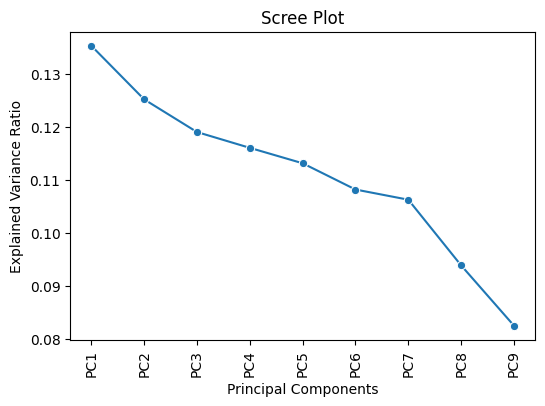

In [92]:
# Plotting Screeplot to see significance of each Principal components

plt.figure(figsize=(6,4))
sns.lineplot(y=pca.explained_variance_ratio_,x=df_pca.columns, marker='o')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.xticks(rotation=90)
plt.title('Scree Plot')

### PC1 to PC7 gives maximum variance information

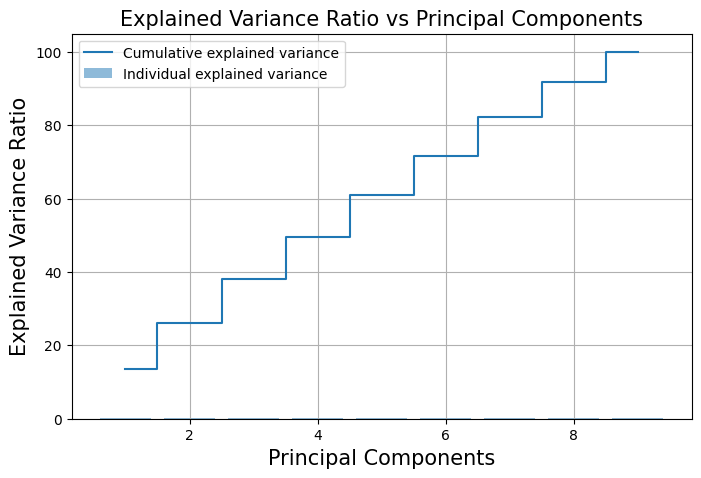

In [99]:
# Plotting Explained Variance Ratio vs Principal Components

plt.figure(figsize=(8 ,5))
plt.bar(range(1, pca.explained_variance_.size + 1), Var, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, pca.explained_variance_.size + 1), Var_Cum, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio',fontsize=15)
plt.xlabel('Principal Components',fontsize=15)
plt.title('Explained Variance Ratio vs Principal Components',fontsize=15)
plt.legend(loc = 'best')
plt.grid()
plt.show()

### From the cumulative sum of Eigen value ratio as well as screeplot and pareto chart we see that the first 7 Principal components contribute to 80% of the variations. 
### This way we can select the optimum number of Pricipal components as per Business requirement and reduce the dimensions.
### Eigen Vectors indicate the directions of the variables in each principal components and also the contributions of each variable under the Principal components

In [100]:
# Getting the PCA scores for 7 PCs
from sklearn.decomposition import PCA
pca=PCA(n_components=7, random_state=123)
pca_score=pca.fit_transform(df_scaled1)
pca_score=pd.DataFrame(pca_score, columns=df_pca.columns[0:7])
pca_score.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-0.46,0.10,-0.50,1.33,1.98,-1.07,0.20
1,0.69,2.23,-2.39,-0.65,0.57,-0.58,0.15
2,-1.25,-0.72,0.02,0.83,-0.48,0.26,1.32
3,-0.72,-0.28,0.23,0.90,0.14,2.54,-0.69
4,-0.37,-0.43,0.47,-1.70,-0.47,-1.36,0.07


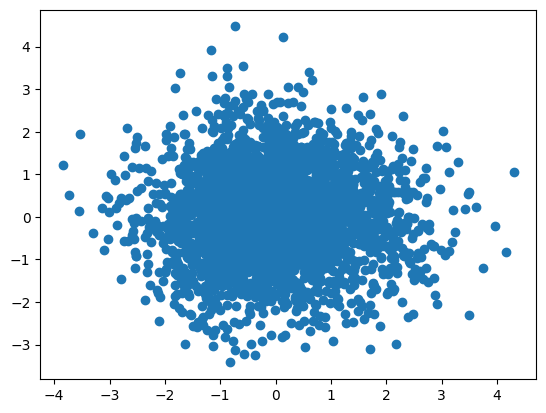

In [104]:
# plot between PCA1 and PCA2 
x = pca_score.iloc[:,0:1]
y = pca_score.iloc[:,1:2]
#z = pca_values[:2:3]
plt.scatter(x,y)
